# Create media designs suggested by ART

We use ART to provide suggested designs for media components for which to get phenotypic data. 

For DBTL 4 we create 8 designs from an exploratory mode with $\alpha=1.$, 7 designs from the exploitation mode ($\alpha=0$) and 1 design being close to the standard media as a control, totalling 16 designs in triplicates. 

Tested using **ART 3.9.4** kernel on jprime.lbl.gov

## Inputs and output

**Required files to run this notebook:**
- `Putida_media_bounds.csv`
- `standard_recipe_concentrations.csv`
- EDD study slug(s)

**File generated by running this notebook**

- 

## Setup

Clone the git repository with the `ART` library 

`git clone https://github.com/JBEI/AutomatedRecommendationTool.git`  
<!-- <font color='red'> _____ -->
<!-- **WE SHOULD TALK ABOUT LICENSING HERE!!!** </font> -->

or pull the latest version. 

Information about licensing ART is available at https://github.com/JBEI/ART.

Importing needed libraries:

In [1]:
import sys
# sys.path.append('../../Mark_F/AutomatedRecommendationTool')        # Make sure this is the location for the ART library 
sys.path.append('../')
import re
import warnings
    
from art.core import *
import art.plot as plot
import edd_utils as eddu

# from core import designs_pairwise

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## User parameters

In [2]:
!pwd

/code/notebooks


In [3]:
CYCLE = 5

user_params = {
    'bounds_file': f'/code/data/flaviolin/Putida_media_bounds.csv',
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
    'standard_media_file': '../data/flaviolin/standard_recipe_concentrations.csv',
    'study_slug_1': 'combinatorial-media-for-flaviolin-dbtl1-ed1e',
    'study_slug_2': 'combinatorial-media-for-flaviolin-dbtl-2',
    'study_slug_3': 'combinatorial-media-for-flaviolin-dbtl-3',
    'study_slug_4': 'combinatorial-media-for-flaviolin-dbtl-4',
    'edd_server': 'edd.jbei.org',
    'username': 'tradivojevic',
}


Specify which components to explore and which response to optimize:

In [4]:
user_params['components'] = [
    'H3BO3',
    'K2SO4',
    'K2HPO4',
    'FeSO4',
    'NH4Cl',
    'MgCl2',
    'NaCl',
    '(NH4)6Mo7O24',
    'CoCl2',
    'CuSO4',
    'MnSO4',
    'ZnSO4'
]

user_params['response'] = 'OD340'

Here we specify how many instances (designs) we want to create and how many replicates: 

In [5]:
user_params['n_instances_explor'] = 5
user_params['n_instances_exploit'] = 10
user_params['n_replicates'] = 3

## Load the data

In [6]:
study_slug_1 = user_params['study_slug_1']
study_slug_2 = user_params['study_slug_2']
study_slug_3 = user_params['study_slug_3']
study_slug_4 = user_params['study_slug_4']
edd_server = user_params['edd_server']
username = user_params['username']

In [7]:
try:
    session = eddu.login(edd_server=edd_server, user=username)
except:
    print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
    print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for tradivojevic:  ··············


OK! Connection to EDD successful. We will try to load data from EDD...


In [8]:
try:
    df_1 = eddu.export_study(session, study_slug_1, edd_server=edd_server)
    df_2 = eddu.export_study(session, study_slug_2, edd_server=edd_server)
    df_3 = eddu.export_study(session, study_slug_3, edd_server=edd_server)
    df_4 = eddu.export_study(session, study_slug_4, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    print(f'ERROR! Not able to export the study.')



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

In [9]:
df_1.head(2)

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,148494,Combinatorial media for flaviolin DBTL1,148495,C1_WA1_A4-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,148543,C1_WA1_A4-R1,NaN,Optical Density,0,NaN,0.4422,48.0
1,148494,Combinatorial media for flaviolin DBTL1,148496,C1_WA1_A4-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,148544,C1_WA1_A4-R2,NaN,Optical Density,0,NaN,0.3405,48.0


In [10]:
df_2.head(2)

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,148639,Combinatorial media for flaviolin DBTL 2,148640,C2_WA1_A4-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,148688,C2_WA1_A4-R1,NaN,Optical Density,0,NaN,0.3717,48.0
1,148639,Combinatorial media for flaviolin DBTL 2,148641,C2_WA1_A4-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,148689,C2_WA1_A4-R2,NaN,Optical Density,0,NaN,0.3748,48.0


In [11]:
df_3.head(2)

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,148929,Combinatorial media for flaviolin DBTL 3,148930,C3_WA1_C1-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,148978,C3_WA1_C1-R1,NaN,Optical Density,0,NaN,1.492,48.0
1,148929,Combinatorial media for flaviolin DBTL 3,148931,C3_WA1_C1-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD600,148979,C3_WA1_C1-R2,NaN,Optical Density,0,NaN,1.016,48.0


Concatenate the three studies:

In [12]:
df = df_1.append(df_2).append(df_3).append(df_4)

Drop unnecessary columns:

In [13]:
df = df.loc[:,['Line Name','Line Description','Protocol','Value']]
df.head()

,Line Name,Line Description,Protocol,Value
0,C1_WA1_A4-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.4422
1,C1_WA1_A4-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.3405
2,C1_WA1_A4-R3,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.3397
3,C1_WA1_A4-R4,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.3602
4,C1_WA5_A8-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",OD340,0.2699


Pivot the dataframe to include columns for all protocols:

In [14]:
df = df.pivot(index=["Line Name", "Line Description"], columns="Protocol", values="Value")
df.reset_index(inplace=True)
df.head()

Protocol,Line Name,Line Description,OD340,OD600
0,C1_WA1_A4-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.4422,2.019
1,C1_WA1_A4-R2,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.3405,0.516
2,C1_WA1_A4-R3,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.3397,0.436
3,C1_WA1_A4-R4,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.3602,0.623
4,C1_WA5_A8-R1,"MOPS: 40.000000, Tricine: 4.000000, H3BO3: 0.0...",0.2699,0.699


### Adding media information to the data frame

Add columns for each component:

In [15]:
components = re.split(': |, ', df['Line Description'][0])[::2]
for comp in components:
    df[comp] = None


And assign values for each component and line:

In [16]:
for i in range(len(df)):
    values = re.split(': |, ', df['Line Description'][i])[1::2]
    for c, value in enumerate(values):
        df.iloc[i, (4+c)] = float(value)

df.drop(columns='Line Description', inplace=True)
df.tail()

Protocol,Line Name,OD340,OD600,MOPS,Tricine,H3BO3,Glucose,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
187,C4_WD7_F7-R2,0.5844,1.098,40.0,4.0,0.032352,20.0,2.681768,6.293779,0.003636,13.0573,1.67801,433.346634,0.000258,0.002099,0.000391,0.007259,0.000835
188,C4_WD7_F7-R3,0.5646,1.238,40.0,4.0,0.032352,20.0,2.681768,6.293779,0.003636,13.0573,1.67801,433.346634,0.000258,0.002099,0.000391,0.007259,0.000835
189,C4_WD8_F8-R1,0.2745,0.859,40.0,4.0,0.003932,20.0,0.309966,1.206566,0.01076,9.146237,0.502864,52.253707,0.00003,0.000304,0.0001,0.000726,0.000098
190,C4_WD8_F8-R2,0.2829,1.002,40.0,4.0,0.003932,20.0,0.309966,1.206566,0.01076,9.146237,0.502864,52.253707,0.00003,0.000304,0.0001,0.000726,0.000098
191,C4_WD8_F8-R3,0.2866,1.148,40.0,4.0,0.003932,20.0,0.309966,1.206566,0.01076,9.146237,0.502864,52.253707,0.00003,0.000304,0.0001,0.000726,0.000098


Define the control lines. In DBTL 1 and 2, controls were wells F5 to F8. In DBTL 3 is stored in the last column (D8, E8, F8).

In [17]:
control_lines = df[df['Line Name'].str.find('WF5_F8') > 0]

control_lines = control_lines.append(df[df['Line Name'].str.find('WD8_F8') > 0])

In [18]:
control_lines

Protocol,Line Name,OD340,OD600,MOPS,Tricine,H3BO3,Glucose,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
44,C1_WF5_F8-R1,0.2856,0.731,40.0,4.0,0.003797,20.0,0.31178,1.325974,0.009506,9.927665,0.568441,50.767801,0.00003,0.000296,0.000096,0.000729,0.000102
45,C1_WF5_F8-R2,0.2936,0.763,40.0,4.0,0.003797,20.0,0.31178,1.325974,0.009506,9.927665,0.568441,50.767801,0.00003,0.000296,0.000096,0.000729,0.000102
46,C1_WF5_F8-R3,0.2715,0.664,40.0,4.0,0.003797,20.0,0.31178,1.325974,0.009506,9.927665,0.568441,50.767801,0.00003,0.000296,0.000096,0.000729,0.000102
47,C1_WF5_F8-R4,0.2891,0.795,40.0,4.0,0.003797,20.0,0.31178,1.325974,0.009506,9.927665,0.568441,50.767801,0.00003,0.000296,0.000096,0.000729,0.000102
92,C2_WF5_F8-R1,0.2934,0.631,40.0,4.0,0.003929,20.0,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095
93,C2_WF5_F8-R2,0.2912,0.593,40.0,4.0,0.003929,20.0,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095
94,C2_WF5_F8-R3,0.3004,0.601,40.0,4.0,0.003929,20.0,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095
95,C2_WF5_F8-R4,0.2990,0.671,40.0,4.0,0.003929,20.0,0.279019,1.232969,0.010158,9.510727,0.483299,47.544745,0.000027,0.000288,0.000104,0.000759,0.000095
141,C3_WD8_F8-R1,0.2813,1.022,40.0,4.0,0.003709,20.0,0.305525,1.243568,0.009372,9.943037,0.472293,53.326661,0.000029,0.000312,0.000094,0.000849,0.000098
142,C3_WD8_F8-R2,0.2755,0.800,40.0,4.0,0.003709,20.0,0.305525,1.243568,0.009372,9.943037,0.472293,53.326661,0.000029,0.000312,0.000094,0.000849,0.000098


How many designs improve response over the standard recipe?

In [19]:
control_response = np.max(control_lines['OD340'])
num_improved_response = np.sum(df['OD340'] > control_response)
num_designs = len(df) - len(control_lines)
print(f'{num_improved_response} samples out of {num_designs} improve over the standard in terms of OD340 ({num_improved_response/num_designs*100:.2f}%).')


139 samples out of 178 improve over the standard in terms of OD340 (78.09%).


### Convert the data to EDD format

Pivot the dataframe back to EDD format, including all the components names and protocols:

In [20]:
df_stacked = df.set_index('Line Name').stack().reset_index()
df_stacked.columns = ['Line Name', 'Measurement Type', 'Value']
df_stacked.head()

,Line Name,Measurement Type,Value
0,C1_WA1_A4-R1,OD340,0.4422
1,C1_WA1_A4-R1,OD600,2.019
2,C1_WA1_A4-R1,MOPS,40.0
3,C1_WA1_A4-R1,Tricine,4.0
4,C1_WA1_A4-R1,H3BO3,0.003744


# Media designs recommendations

## ART generated media

Define a dictionary that contains the settings that ART will use to find the recommended designs:

In [21]:
art_params = {
    'input_vars': user_params['components'],
    'response_vars': [user_params['response']],
    'bounds_file': user_params['bounds_file'], # file with bounds# input variables, i.e. features
    'seed': 10,                                           # seed for number random generator
    'cross_val': True,
    'recommend': False,
    'output_directory': user_params['output_file_path'],  # directory to store this output
    'verbose': 1,
#     'max_mcmc_cores': 50
}


We will first run only model building part and then proceed with optimization using the two modes - exploration and exploitation>

In [22]:
user_params['alpha_explor'] = 1.0
user_params['alpha_exploit'] = None

With the configuration stored in art_params, we now run ART:

In [23]:
run_art = True

Defaulting to a maximum of 4 cores for MCMC sampling (all available).  See the max_mcmc_cores parameter to control ART's use of parallelism.
Best pipeline: ExtraTreesRegressor(PolynomialFeatures(SGDRegressor(CombineDFs(input_matrix, input_matrix), alpha=0.0, eta0=0.01, fit_intercept=False, l1_ratio=0.5, learning_rate=invscaling, loss=huber, penalty=elasticnet, power_t=0.5), degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.55, min_samples_leaf=20, min_samples_split=11, n_estimators=100)


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 3 divergences: 100%|██████████| 44000/44000 [01:19<00:00, 555.62draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Best pipeline: RidgeCV(XGBRegressor(VarianceThreshold(input_matrix, threshold=0.2), learning_rate=0.01, max_depth=10, min_child_weight=18, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0))


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 0 divergences: 100%|██████████| 44000/44000 [01:43<00:00, 423.22draws/s]


Best pipeline: RidgeCV(XGBRegressor(PCA(CombineDFs(input_matrix, RidgeCV(PCA(input_matrix, iterated_power=3, svd_solver=randomized))), iterated_power=3, svd_solver=randomized), learning_rate=0.01, max_depth=2, min_child_weight=9, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.3, verbosity=0))


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 15 divergences: 100%|██████████| 44000/44000 [01:39<00:00, 441.23draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


Best pipeline: XGBRegressor(VarianceThreshold(input_matrix, threshold=0.1), learning_rate=0.1, max_depth=5, min_child_weight=8, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.4, verbosity=0)


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 30 divergences: 100%|██████████| 44000/44000 [01:12<00:00, 610.67draws/s]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


Best pipeline: ExtraTreesRegressor(RandomForestRegressor(LinearSVR(input_matrix, C=0.1, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=1e-05), bootstrap=False, max_features=0.3, min_samples_leaf=13, min_samples_split=3, n_estimators=100), bootstrap=True, max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=12, n_estimators=100)


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 6 divergences: 100%|██████████| 44000/44000 [01:19<00:00, 550.12draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Best pipeline: LassoLarsCV(XGBRegressor(MaxAbsScaler(CombineDFs(input_matrix, input_matrix)), learning_rate=0.1, max_depth=3, min_child_weight=19, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9000000000000001, verbosity=0), normalize=False)


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 4 divergences: 100%|██████████| 44000/44000 [02:41<00:00, 271.88draws/s]
The acceptance probability does not match the target. It is 0.886233958570022, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


Best pipeline: RidgeCV(CombineDFs(Binarizer(input_matrix, threshold=0.65), input_matrix))


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 1 divergences: 100%|██████████| 44000/44000 [02:06<00:00, 348.41draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Best pipeline: ExtraTreesRegressor(XGBRegressor(OneHotEncoder(RidgeCV(XGBRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9000000000000001, verbosity=0)), minimum_fraction=0.2, sparse=False, threshold=10), learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.6500000000000001, verbosity=0), bootstrap=True, max_features=0.55, min_samples_leaf=2, min_samples_split=12, n_estimators=100)


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 15 divergences: 100%|██████████| 44000/44000 [01:27<00:00, 503.85draws/s]
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Best pipeline: XGBRegressor(RandomForestRegressor(VarianceThreshold(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), threshold=0.0005), bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=5, min_samples_split=2, n_estimators=100), learning_rate=0.1, max_depth=5, min_child_weight=8, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.5, verbosity=0)


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 97 divergences: 100%|██████████| 44000/44000 [01:13<00:00, 595.30draws/s]
There were 95 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6687375696470786, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Best pipeline: XGBRegressor(LinearSVR(LinearSVR(VarianceThreshold(input_matrix, threshold=0.0005), C=20.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=0.0001), C=20.0, dual=True, epsilon=0.1, loss=squared_epsilon_insensitive, tol=0.0001), learning_rate=0.1, max_depth=1, min_child_weight=17, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.6000000000000001, verbosity=0)


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 2 divergences: 100%|██████████| 44000/44000 [02:10<00:00, 336.14draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


,MAE,MRAE(%),StdAE,MSE,$R^2$
Name,,,,,
Neural Regressor,0.141671,40.030865,0.102689,0.030616,-0.490968
Random Forest Regressor,0.054718,15.390518,0.052298,0.005729,0.720990
TPOT Regressor,0.056075,15.435011,0.043705,0.005054,0.753850
Support Vector Regressor,0.085332,24.854194,0.053014,0.010092,0.508520
Kernel Ridge Regressor,0.105712,25.906211,0.082420,0.017968,0.124964
K-NN Regressor,0.081428,23.473636,0.075495,0.012330,0.399535
Gaussian Process Regressor,0.084277,23.680166,0.057482,0.010407,0.493194
Gradient Boosting Regressor,0.054837,15.401393,0.048411,0.005351,0.739425
Ensemble Model,0.055939,15.399486,0.044817,0.005138,0.749794


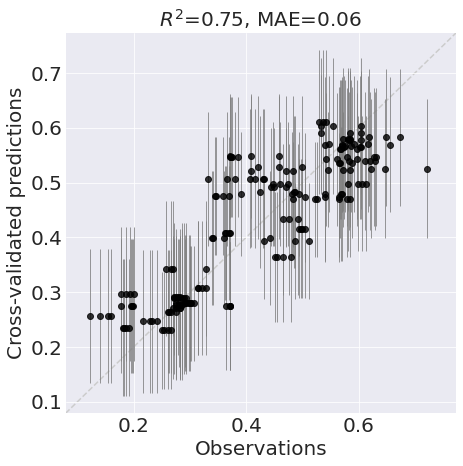

Best pipeline: RidgeCV(VarianceThreshold(AdaBoostRegressor(PolynomialFeatures(XGBRegressor(input_matrix, learning_rate=0.1, max_depth=9, min_child_weight=16, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.7000000000000001, verbosity=0), degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, loss=square, n_estimators=100), threshold=0.05))


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]
Sampling 4 chains, 7 divergences: 100%|██████████| 44000/44000 [02:16<00:00, 321.54draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


,MAE,MRAE(%),StdAE,MSE,$R^2$
Name,,,,,
Neural Regressor,0.083214,21.542681,0.059628,0.010480,0.489630
Random Forest Regressor,0.013895,3.312733,0.013867,0.000385,0.981234
TPOT Regressor,0.014489,3.552966,0.014094,0.000409,0.980102
Support Vector Regressor,0.061435,17.357723,0.031804,0.004786,0.766935
Kernel Ridge Regressor,0.024226,6.002407,0.022258,0.001082,0.947292
K-NN Regressor,0.025178,6.614505,0.022437,0.001137,0.944611
Gaussian Process Regressor,0.013877,3.337972,0.013828,0.000384,0.981310
Gradient Boosting Regressor,0.013773,3.291436,0.013841,0.000381,0.981432
Ensemble Model,0.015092,3.749769,0.014168,0.000428,0.979133


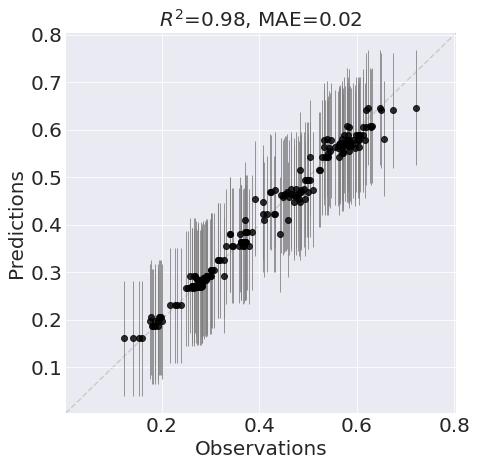

CPU times: user 56min 22s, sys: 2min 50s, total: 59min 12s
Wall time: 1h 12min 48s


In [25]:
%%time
warnings.filterwarnings("ignore")
if run_art:
    art = RecommendationEngine(df_stacked, **art_params)
else:
    with open(os.path.join(art_params['output_directory'], 'art.pkl'), 'rb') as output:
        art = pickle.load(output)

In [26]:
art.evaluate_models_cv()

,MAE,MRAE(%),StdAE,MSE,$R^2$
Name,,,,,
Neural Regressor,0.141671,40.030865,0.102689,0.030616,-0.490968
Random Forest Regressor,0.054718,15.390518,0.052298,0.005729,0.720990
TPOT Regressor,0.056075,15.435011,0.043705,0.005054,0.753850
Support Vector Regressor,0.085332,24.854194,0.053014,0.010092,0.508520
Kernel Ridge Regressor,0.105712,25.906211,0.082420,0.017968,0.124964
K-NN Regressor,0.081428,23.473636,0.075495,0.012330,0.399535
Gaussian Process Regressor,0.084277,23.680166,0.057482,0.010407,0.493194
Gradient Boosting Regressor,0.054837,15.401393,0.048411,0.005351,0.739425
Ensemble Model,0.055939,15.399486,0.044817,0.005138,0.749794


### Exploitation recommendations

In [27]:
%%time
art.niter = 100000
art.alpha = user_params['alpha_exploit']
draws = art.parallel_tempering_opt()


Starting parallel tempering using 4 chains.
MPI warnings below are expected and do not appear to impact results.
See https://github.com/jellis18/PTMCMCSampler/issues/23
Running parallel tempering script in /code/notebooks/..
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Do not have acor package
Running chain 2 of 4
Do not have acor package
Running chain 1 of 4
Do not have acor package
Do not have acor package
Running chain 3 of 4
Running chain 4 of 4
Chain 3 of 4 loaded ART model in 3.48 s
INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '4469')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/artuser/.theano/compile

In [27]:
# file_path = f"{art_params['output_directory']}/draws_exploit.txt"
# draws = np.loadtxt(file_path)
# draws = draws[:, :-2]

In [28]:
orig_file_name = f"{art_params['output_directory']}/draws.txt"
new_file_name = f"{art_params['output_directory']}/draws_exploit.txt"
os.rename(orig_file_name, new_file_name)

In [28]:
art.num_recommendations = user_params['n_instances_exploit'] - 5 # 10 exploitation recommendations in DBTL5
art.rel_rec_distance = 0.2 # Default is 0.2
art.recommend(draws)
df_rec_exploit = art.recommendations.copy()

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340
0,0.030851,0.193823,2.968560,0.062151,13.770459,2.158244,327.434888,0.000126,0.002049,0.000767,0.000625,0.000542,0.624565
1,0.026618,0.178729,5.271786,0.046587,10.728408,2.566785,338.143039,0.000106,0.001254,0.000751,0.002341,0.000775,0.616771
2,0.015822,0.187497,5.687716,0.048338,10.359198,2.326866,394.369616,0.000225,0.001212,0.000588,0.003088,0.000700,0.609587
3,0.011239,0.209306,4.421251,0.052244,12.906592,3.997308,471.149314,0.000173,0.001705,0.000959,0.002328,0.000942,0.606639
4,0.011581,0.098664,3.504922,0.055516,9.428936,2.683970,398.056816,0.000211,0.001953,0.000902,0.002679,0.000092,0.602898


In [29]:
art.num_recommendations = 5 # 7 in this DBTL4
art.rel_rec_distance = 1.7 # Default is 0.2
# At least one of the features in the recommendation must differ by this relative factor from any point in the training data and any previous recommendations
# Then pick the one with the best objective function value and add to the recommendations. Repeat the distance filtering above. 
# Stops when 7 recommendations are found.

# If it cannot find enough recommendations, it will decrease the distance by 0.80x and try again.
art.recommend(draws)


,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340
0,0.025832,2.431422,4.094736,0.024244,13.426654,2.015336,406.812520,0.000199,0.002917,0.000490,0.003536,0.000898,0.567691
1,0.017216,2.624487,3.789566,0.065907,9.175414,2.509852,398.573523,0.000110,0.002615,0.000339,0.003635,0.000505,0.549765
2,0.011387,2.457756,5.421489,0.065707,8.461985,4.146051,494.833552,0.000122,0.002261,0.000954,0.003318,0.000460,0.537279
3,0.033689,2.524013,4.352552,0.082496,13.542421,5.042250,409.190588,0.000272,0.002217,0.000948,0.005148,0.000109,0.517753
4,0.037505,2.472715,5.174652,0.088348,11.941451,0.809407,321.206134,0.000163,0.002909,0.000936,0.003780,0.000351,0.517310


In [30]:
df_rec_exploit = df_rec_exploit.append(art.recommendations.copy())

Add standard deviation for the predictions:

In [31]:
predicted_mean, predicted_std = art.post_pred_stats(
            df_rec_exploit.values[:, :-1]
        ) # posterior predictive statistics: mean and std

df_rec_exploit['OD340_std'] = predicted_std
df_rec_exploit['Label'] = 'exploitation' # will be used for plotting in the parity plot in notebook F

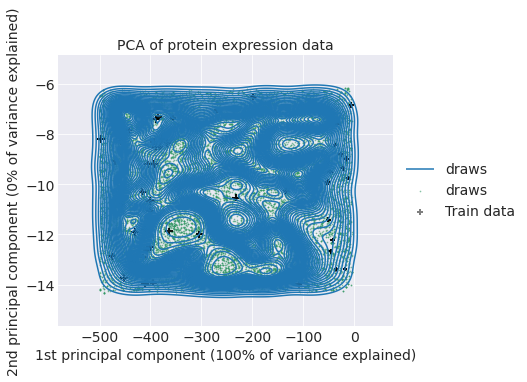

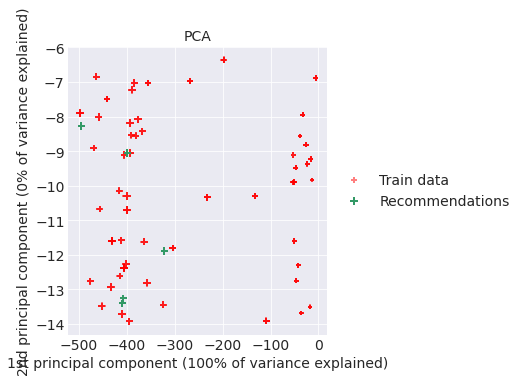

In [32]:
plot.draws_pc(art, draws, scale=100, plot_draws=True, plot_kde=True)
plot.recommendations_pc(art, scale=100)


In [40]:
plot.model_pairwise(art)

### Exploration recommendations

In [41]:
%%time
art.niter = 100000
art.alpha = user_params['alpha_explor']
draws = art.parallel_tempering_opt()


Starting parallel tempering using 4 chains.
MPI warnings below are expected and do not appear to impact results.
See https://github.com/jellis18/PTMCMCSampler/issues/23
Running parallel tempering script in /code/notebooks/..
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Do not have acor package
Running chain 4 of 4
Do not have acor package
Running chain 2 of 4
Do not have acor package
Running chain 1 of 4
Do not have acor package
Running chain 3 of 4
Chain 4 of 4 loaded ART model in 2.70 s
INFO (theano.gof.compilelock): Waiting for existing lock by process '5923' (I am process '5924')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/artuser/.theano/compiled

In [33]:
file_path = f"{art_params['output_directory']}/draws_explor.txt"
draws = np.loadtxt(file_path)
draws = draws[:, :-2]

In [42]:
orig_file_name = f"{art_params['output_directory']}/draws.txt"
new_file_name = f"{art_params['output_directory']}/draws_explor.txt"
os.rename(orig_file_name, new_file_name)

In [34]:
art.num_recommendations = user_params['n_instances_explor']
art.rel_rec_distance = 1.8
art.recommend(draws)

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340
0,0.027863,2.652067,5.824056,0.015112,13.944572,1.661694,391.304261,0.000176,0.002045,0.000607,0.004395,0.000825,0.557448
1,0.004214,2.469812,4.796489,0.054636,9.285996,2.963933,455.136977,0.000230,0.002547,0.000783,0.002747,0.000903,0.557071
2,0.020497,2.589884,4.695758,0.054419,9.558000,2.670483,459.548005,0.000098,0.002955,0.000353,0.003897,0.000515,0.553743
3,0.037489,2.431795,5.052745,0.058807,9.155386,2.372341,361.921617,0.000280,0.002575,0.000967,0.004346,0.000037,0.532142
4,0.034021,2.646352,3.543764,0.099120,13.109367,2.700242,365.834621,0.000292,0.001348,0.000752,0.002060,0.000949,0.531485


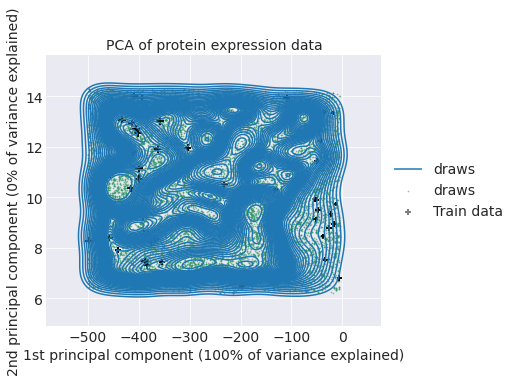

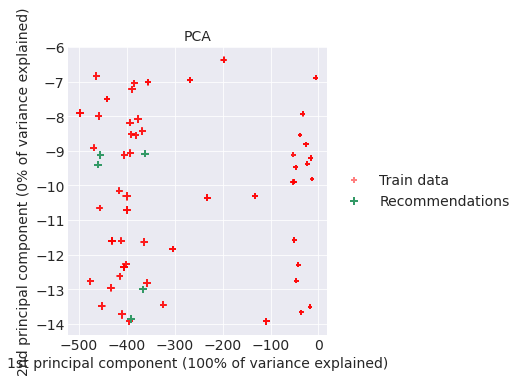

In [35]:
plot.draws_pc(art, draws, scale=100, plot_draws=True, plot_kde=True)
plot.recommendations_pc(art, scale=100)


In [36]:
df_rec_explor = art.recommendations.copy()


In [37]:
predicted_mean, predicted_std = art.post_pred_stats(
            df_rec_explor.values[:, :-1]
        )

df_rec_explor['OD340_std'] = predicted_std
df_rec_explor['Label'] = 'exploration'

In [38]:
df_rec = df_rec_exploit.append(df_rec_explor)

In [39]:
df_rec = df_rec.rename(columns={"OD340": "OD340_pred"})

### Generate the control media 

Read the standard recipe:

In [40]:
df_stand = pd.read_csv(user_params['standard_media_file']).set_index("Component")

Control media will be uniformly drawn from the interval 90% to 110% around the standard recipe.

In [56]:
ub = 1.1
lb = 0.9
df_control = pd.DataFrame(columns=user_params['components'])

for component in user_params['components']:
    stand_conc = df_stand.loc[component]['Concentration[mM]']
    df_control.at['Control', component] = stand_conc*np.random.uniform(lb, ub)

df_control

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
Control,0.004112,0.261299,1.194531,0.01038,8.894713,0.540169,47.852656,0.000027,0.000305,0.000096,0.000772,0.000109


In [56]:
values = np.array([[0.00411170331879645,
 0.2612990681859670,
 1.1945310388217200,
 0.010380052770631400,
 8.894713109246460,
 0.5401687900636200,
 47.852656231218100,
 2.73306355246901E-05,
 0.0003049333741551610,
 9.59163745313119E-05,
 0.0007716505816920490,
 0.00010933978775710000
         ]])
df_control = pd.DataFrame(data=values, columns=user_params['components'])
df_control

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4
0,0.004112,0.261299,1.194531,0.01038,8.894713,0.540169,47.852656,0.000027,0.000305,0.000096,0.000772,0.000109


Check that these controls are not equivalent to the controls tested in previous cycles:

In [57]:
for component in user_params['components']:
     assert(all(df_control.at['Control', component] != control_lines[component]))

KeyError: 'Control'

Add ART's prediction for this design

In [58]:
control_predicted_mean, control_predicted_std = art.post_pred_stats(
            df_control.values
        )
df_control['OD340_pred'] = control_predicted_mean
df_control['OD340_std'] = control_predicted_std
df_control['Label'] = 'standard'

In [59]:
df_rec = df_rec.append(df_control).reset_index(drop=True)
df_rec

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340_pred,OD340_std,Label
0,0.030851,0.193823,2.968560,0.062151,13.770459,2.158244,327.434888,0.000126,0.002049,0.000767,0.000625,0.000542,0.624565,0.061922,exploitation
1,0.026618,0.178729,5.271786,0.046587,10.728408,2.566785,338.143039,0.000106,0.001254,0.000751,0.002341,0.000775,0.616771,0.062203,exploitation
2,0.015822,0.187497,5.687716,0.048338,10.359198,2.326866,394.369616,0.000225,0.001212,0.000588,0.003088,0.000700,0.609587,0.062257,exploitation
3,0.011239,0.209306,4.421251,0.052244,12.906592,3.997308,471.149314,0.000173,0.001705,0.000959,0.002328,0.000942,0.606639,0.061926,exploitation
4,0.011581,0.098664,3.504922,0.055516,9.428936,2.683970,398.056816,0.000211,0.001953,0.000902,0.002679,0.000092,0.602898,0.062125,exploitation
5,0.025832,2.431422,4.094736,0.024244,13.426654,2.015336,406.812520,0.000199,0.002917,0.000490,0.003536,0.000898,0.567691,0.061822,exploitation
6,0.017216,2.624487,3.789566,0.065907,9.175414,2.509852,398.573523,0.000110,0.002615,0.000339,0.003635,0.000505,0.549765,0.061864,exploitation
7,0.011387,2.457756,5.421489,0.065707,8.461985,4.146051,494.833552,0.000122,0.002261,0.000954,0.003318,0.000460,0.537279,0.061779,exploitation
8,0.033689,2.524013,4.352552,0.082496,13.542421,5.042250,409.190588,0.000272,0.002217,0.000948,0.005148,0.000109,0.517753,0.062314,exploitation
9,0.037505,2.472715,5.174652,0.088348,11.941451,0.809407,321.206134,0.000163,0.002909,0.000936,0.003780,0.000351,0.517310,0.061834,exploitation


### Check the distribution of designs

Define dataframe with train data and predictions:

In [60]:
df_train = df[user_params['components']]
df_train['OD340'] = df['OD340']

Add predictions, cv-predictions and standard deviation of the OD340 predictions:

In [61]:
train_predicted_mean, train_predicted_std = art.post_pred_stats(
            df_train.values[:, :-1]
        )

In [62]:
df_train['OD340_pred'] = train_predicted_mean
df_train['OD340_std'] = train_predicted_std
df_train['OD340_cv_pred'] = art.model_df_cv[0]["Predictions"]["Ensemble Model"]
df_train['OD340_cv_std'] = art.model_df_cv[0]["Predictions StDev"]["Ensemble Model"]

Add label for control lines:

In [63]:
df_train['Label'] = 'train'
df_train.loc[control_lines.index, 'Label'] = 'standard'

In [64]:
df_train

Protocol,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340,OD340_pred,OD340_std,OD340_cv_pred,OD340_cv_std,Label
0,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.4422,0.380331,0.061722,0.399012,0.062488,train
1,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.3405,0.380331,0.061722,0.399012,0.062488,train
2,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.3397,0.380331,0.061722,0.399012,0.062488,train
3,0.003744,0.029492,3.995413,0.042847,6.490478,0.214493,197.916509,0.000016,0.000254,0.000309,0.006371,0.000866,0.3602,0.380331,0.061722,0.399012,0.062488,train
4,0.009185,0.380499,1.156774,0.007971,11.618192,5.030266,50.60791,0.000155,0.000152,0.000029,0.00041,0.000277,0.2699,0.272069,0.061773,0.271477,0.066630,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.032352,2.681768,6.293779,0.003636,13.0573,1.67801,433.346634,0.000258,0.002099,0.000391,0.007259,0.000835,0.5844,0.569786,0.061782,0.470041,0.053597,train
188,0.032352,2.681768,6.293779,0.003636,13.0573,1.67801,433.346634,0.000258,0.002099,0.000391,0.007259,0.000835,0.5646,0.569786,0.061782,0.470041,0.053597,train
189,0.003932,0.309966,1.206566,0.01076,9.146237,0.502864,52.253707,0.00003,0.000304,0.0001,0.000726,0.000098,0.2745,0.280968,0.061725,0.276981,0.070134,standard
190,0.003932,0.309966,1.206566,0.01076,9.146237,0.502864,52.253707,0.00003,0.000304,0.0001,0.000726,0.000098,0.2829,0.280968,0.061725,0.276981,0.070134,standard


Save train data set for this cycle:

In [65]:
file = f"{user_params['output_file_path']}/train_pred.csv"
df_train.to_csv(file)

In [66]:
def designs_pairwise(art, df_rec, user_params, df_train=None):

    dim = art.num_input_var

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(figsize=(35, 35))
    fig.patch.set_facecolor("white")

    X = df_rec[user_params['components']].values
    X_train = df_train[user_params['components']].values
    standard = df_train[df_train['Label']=='standard'].drop(columns='Label').values

    for var1 in range(dim):
        for var2 in range(var1 + 1, dim):

            ax = fig.add_subplot(dim, dim, (var2 * dim + var1 + 1))
            ax.scatter(
                X_train[:, var1],
                X_train[:, var2],
                c="r",
                marker="+",
                s=150*df_train['OD340'],
                lw=1,
                label="Train data",
            )
            
            ax.scatter(
                standard[:, var1],
                standard[:, var2],
                c="k",
                marker="+",
                s=150*standard[:, -1].astype(float),
                lw=1,
                label="Standard",
            )
            
            ax.scatter(
                X[:, var1],
                X[:, var2],
                c="g",
                marker="+",
                s=150*df_rec['OD340_pred'],
                lw=1,
                label="Recommendations",
            )
            
            ax.scatter(
                X[-1, var1],
                X[-1, var2],
                c="k",
                marker="+",
                s=150*df_rec['OD340_pred'].values[-1],
                lw=1,
                label="Standard",
            )
            
            
                        
            if var2 == (dim - 1):
                ax.set_xlabel(art.input_vars[var1])
            if var1 == 0:
                ax.set_ylabel(art.input_vars[var2])
                if var2 == 0:
                    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), shadow=True)

    fig.savefig(
        f'{art.outDir}/designs_pairwise.png',
        bbox_inches="tight",
        transparent=False, 
        dpi=300
    )

Red are train data, green are recommendations, black are standards

In [67]:
import matplotlib.pyplot as plt

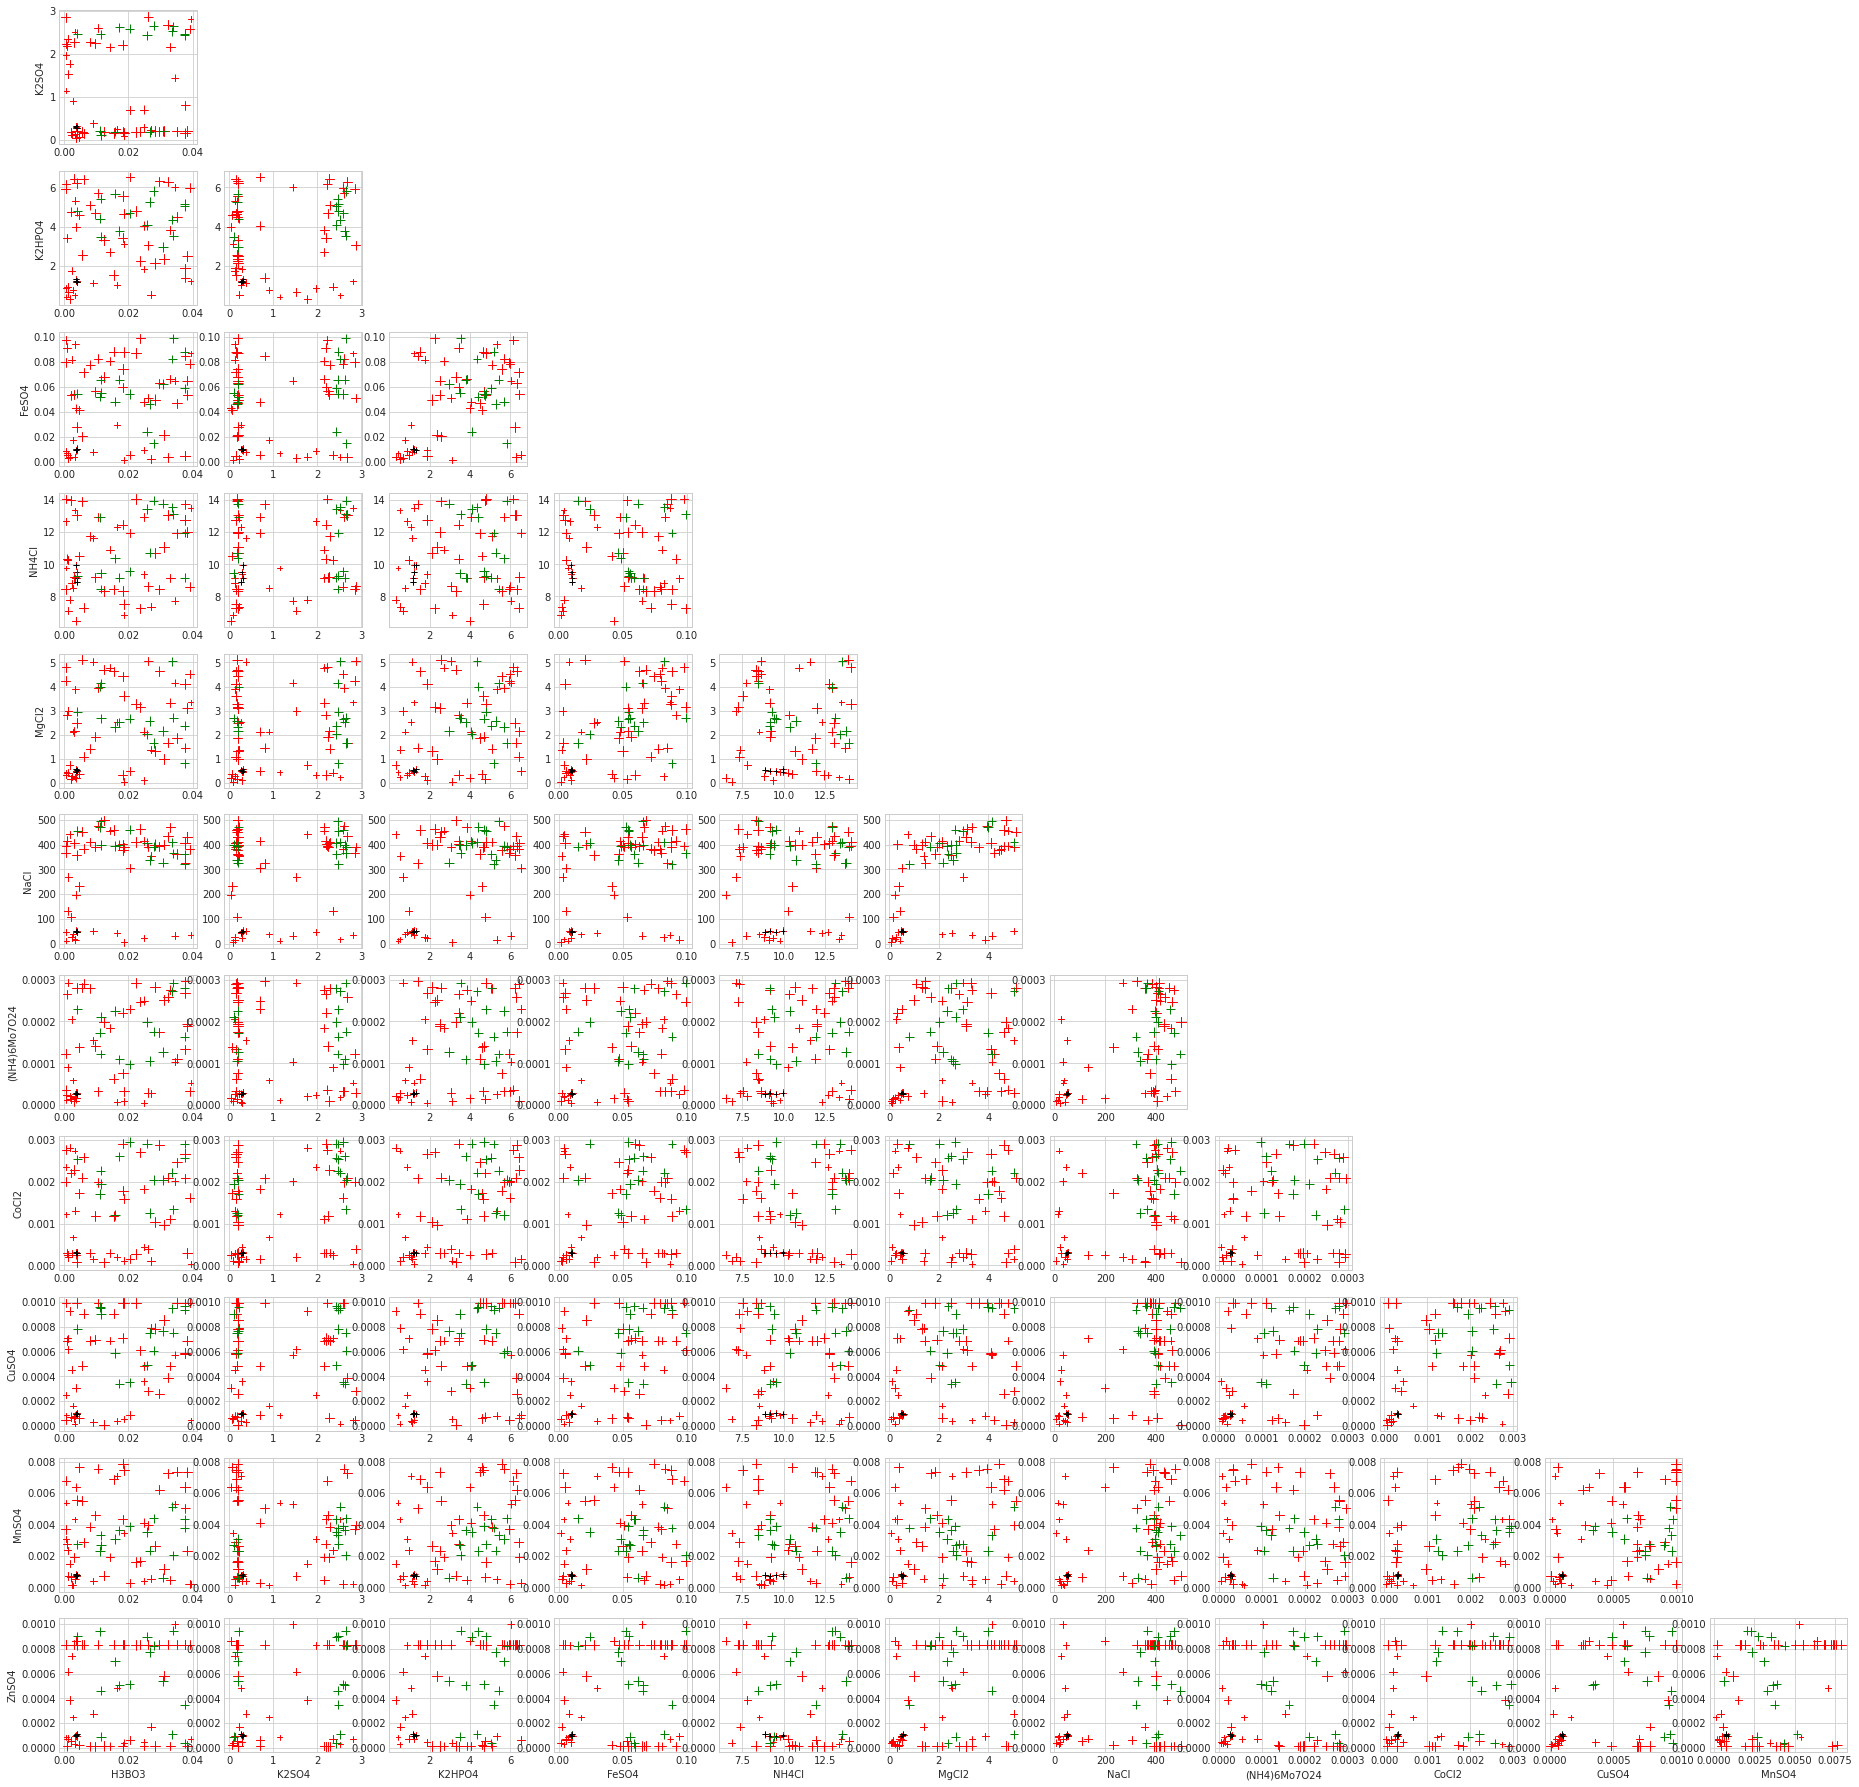

In [68]:
designs_pairwise(art, df_rec, user_params, df_train)

## Saving the generated designs

Include all replicates: 

In [69]:
df_rec = df_rec.loc[df_rec.index.repeat(user_params['n_replicates'])]


Rename index to well names:

In [70]:
well_rows = 'ABCDEF'
well_columns = '12345678'

In [71]:
well_names = [f'{row}{column}'  for column in well_columns for row in well_rows]

df_rec['Well'] = well_names
df_rec = df_rec.set_index(['Well'])
df_rec.head()

,H3BO3,K2SO4,K2HPO4,FeSO4,NH4Cl,MgCl2,NaCl,(NH4)6Mo7O24,CoCl2,CuSO4,MnSO4,ZnSO4,OD340_pred,OD340_std,Label
Well,,,,,,,,,,,,,,,
A1,0.030851,0.193823,2.968560,0.062151,13.770459,2.158244,327.434888,0.000126,0.002049,0.000767,0.000625,0.000542,0.624565,0.061922,exploitation
B1,0.030851,0.193823,2.968560,0.062151,13.770459,2.158244,327.434888,0.000126,0.002049,0.000767,0.000625,0.000542,0.624565,0.061922,exploitation
C1,0.030851,0.193823,2.968560,0.062151,13.770459,2.158244,327.434888,0.000126,0.002049,0.000767,0.000625,0.000542,0.624565,0.061922,exploitation
D1,0.026618,0.178729,5.271786,0.046587,10.728408,2.566785,338.143039,0.000106,0.001254,0.000751,0.002341,0.000775,0.616771,0.062203,exploitation
E1,0.026618,0.178729,5.271786,0.046587,10.728408,2.566785,338.143039,0.000106,0.001254,0.000751,0.002341,0.000775,0.616771,0.062203,exploitation


In [72]:
file = f"{user_params['output_file_path']}/target_concentrations.csv"
df_rec.to_csv(file) # This file will be used for the computation of volume transfers and data analysis